In [6]:
import requests
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = "C:\\Users\\Flore\\Desktop\\EDA_SURF ESKOLA\\EDA\\archivo_limpio.csv"
turism = pd.read_csv(path, sep=",")
turism

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2023,1,A Coru�a,Am�rica,Argentina,295.0,"3098,0","10,5"
1,2023,1,A Coru�a,Am�rica,Brasil,498.0,"4084,0","8,2"
2,2023,1,A Coru�a,Am�rica,Canad�,1385.0,"15512,0","11,2"
3,2023,1,A Coru�a,Am�rica,Chile,58.0,"505,0","8,7"
4,2023,1,A Coru�a,Am�rica,Colombia,370.0,"4662,0","12,6"
...,...,...,...,...,...,...,...,...
68083,2024,12,�vila,Europa,Reino Unido,192.0,"1536,0","8,0"
68084,2024,12,�vila,Europa,Ruman�a,135.0,"2160,0","16,0"
68085,2024,12,�vila,Europa,Suecia,296.0,"5180,0","17,5"
68086,2024,12,�vila,Europa,Suiza,98.0,"490,0","5,0"


In [33]:
df= pd.DataFrame(turism)


# Filtro por años
filtro = df[df["AÑO"]>=2024]
turistas= pd.DataFrame(filtro)

#Agrupo los turistas por provincias
agrupado= turistas.groupby(["MES", "PROVINCIA_DESTINO", "PAIS_ORIGEN"])["TURISTAS"].sum().reset_index()

#Codigo para ir sacando las graficas por las provincias que me interesan para el estudio

provincia_Bizkaia= agrupado[agrupado["PROVINCIA_DESTINO"]== "Bizkaia"]
provincia_Bizkaia.sort_values(["TURISTAS"], ascending=False)

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
20561,8,Bizkaia,Francia,22048.0
11476,5,Bizkaia,Francia,17018.0
8526,4,Bizkaia,Francia,16568.0
17502,7,Bizkaia,Francia,15714.0
26802,10,Bizkaia,Francia,14462.0
...,...,...,...,...
3103,2,Bizkaia,Pakist�n,30.0
26846,10,Bizkaia,Sud�frica,30.0
29972,11,Bizkaia,Egipto,30.0
14465,6,Bizkaia,Andorra,30.0


## Nº DE TURISTAS ENERO 2024 EN BIZKAIA

In [ ]:
#Función filtrar por prov y mes:

def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes= filtrar_datos("Bizkaia", mes= 1) 
prov_Bizkaia_mes_ordenada= provincia_Bizkaia_mes.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes_ordenada


,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
491,1,Bizkaia,Francia,11427.0
467,1,Bizkaia,Alemania,7691.0
510,1,Bizkaia,Pa�ses Bajos,3207.0
514,1,Bizkaia,Reino Unido,2886.0
498,1,Bizkaia,Italia,2177.0
513,1,Bizkaia,Portugal,1831.0
521,1,Bizkaia,Suecia,1658.0
512,1,Bizkaia,Polonia,1395.0
487,1,Bizkaia,Estados Unidos de Am�rica,1280.0
472,1,Bizkaia,Austria,1197.0


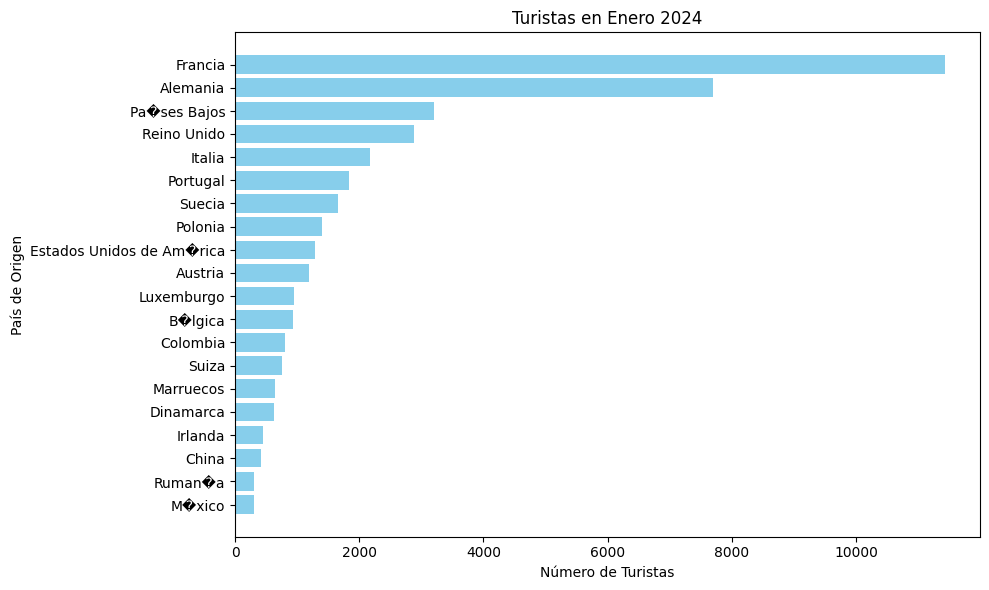

In [40]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Enero 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()



## Nº DE TURISTAS FEBRERO 2024 EN BIZKAIA

In [43]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes2= filtrar_datos("Bizkaia", mes= 2) 
prov_Bizkaia_mes2_ordenada= provincia_Bizkaia_mes2.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes2_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
3084,2,Bizkaia,Francia,9598.0
3060,2,Bizkaia,Alemania,6734.0
3105,2,Bizkaia,Pa�ses Bajos,3738.0
3109,2,Bizkaia,Reino Unido,2538.0
3116,2,Bizkaia,Suecia,1738.0
3108,2,Bizkaia,Portugal,1736.0
3092,2,Bizkaia,Italia,1535.0
3065,2,Bizkaia,Austria,1449.0
3107,2,Bizkaia,Polonia,1349.0
3070,2,Bizkaia,B�lgica,1344.0


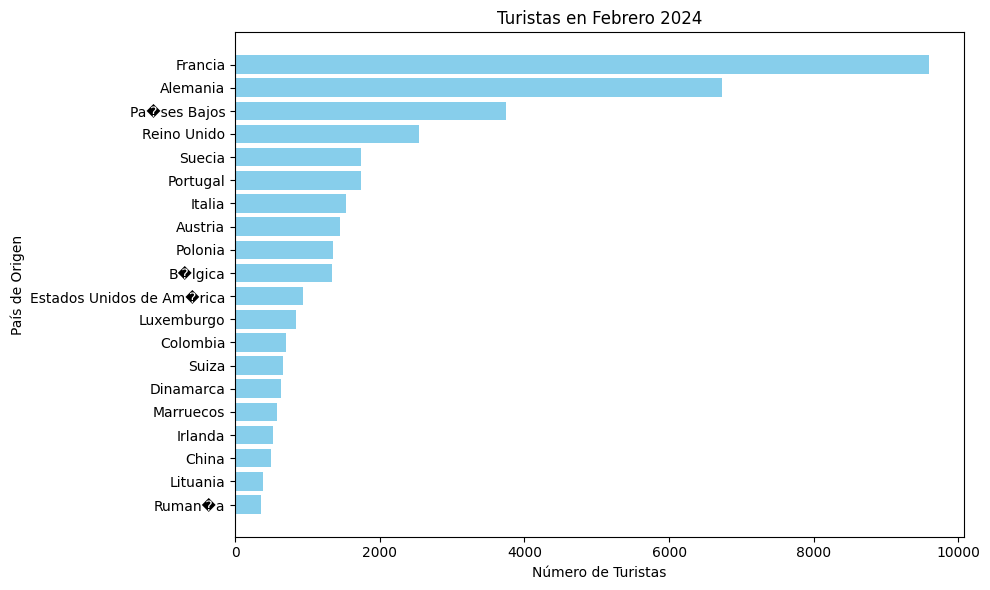

In [45]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes2_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes2_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Febrero 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS MARZO 2024 EN BIZKAIA

In [46]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes3= filtrar_datos("Bizkaia", mes= 3) 
prov_Bizkaia_mes3_ordenada= provincia_Bizkaia_mes3.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes3_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
5731,3,Bizkaia,Francia,11884.0
5707,3,Bizkaia,Alemania,10078.0
5754,3,Bizkaia,Pa�ses Bajos,5064.0
5758,3,Bizkaia,Reino Unido,4201.0
5740,3,Bizkaia,Italia,2185.0
5766,3,Bizkaia,Suecia,2062.0
5756,3,Bizkaia,Polonia,2061.0
5757,3,Bizkaia,Portugal,1934.0
5716,3,Bizkaia,B�lgica,1926.0
5712,3,Bizkaia,Austria,1833.0


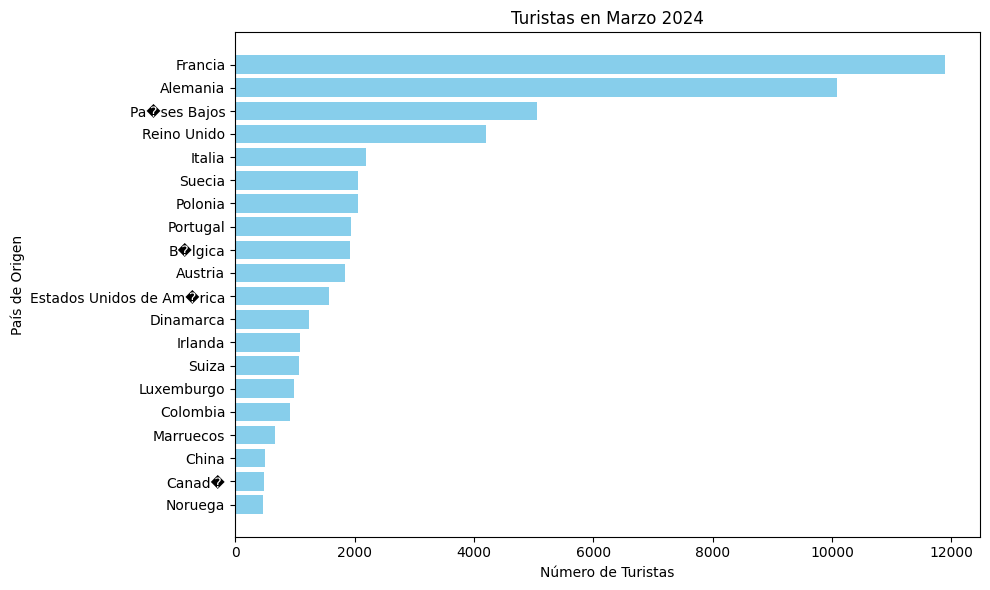

In [47]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes3_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes3_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Marzo 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS ABRIL 2024 EN BIZKAIA

In [48]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes4= filtrar_datos("Bizkaia", mes= 4) 
prov_Bizkaia_mes4_ordenada= provincia_Bizkaia_mes4.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes4_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
8526,4,Bizkaia,Francia,16568.0
8500,4,Bizkaia,Alemania,10443.0
8550,4,Bizkaia,Pa�ses Bajos,6218.0
8554,4,Bizkaia,Reino Unido,4949.0
8553,4,Bizkaia,Portugal,3069.0
8536,4,Bizkaia,Italia,3033.0
8511,4,Bizkaia,B�lgica,2379.0
8561,4,Bizkaia,Suecia,2333.0
8522,4,Bizkaia,Estados Unidos de Am�rica,2282.0
8552,4,Bizkaia,Polonia,2211.0


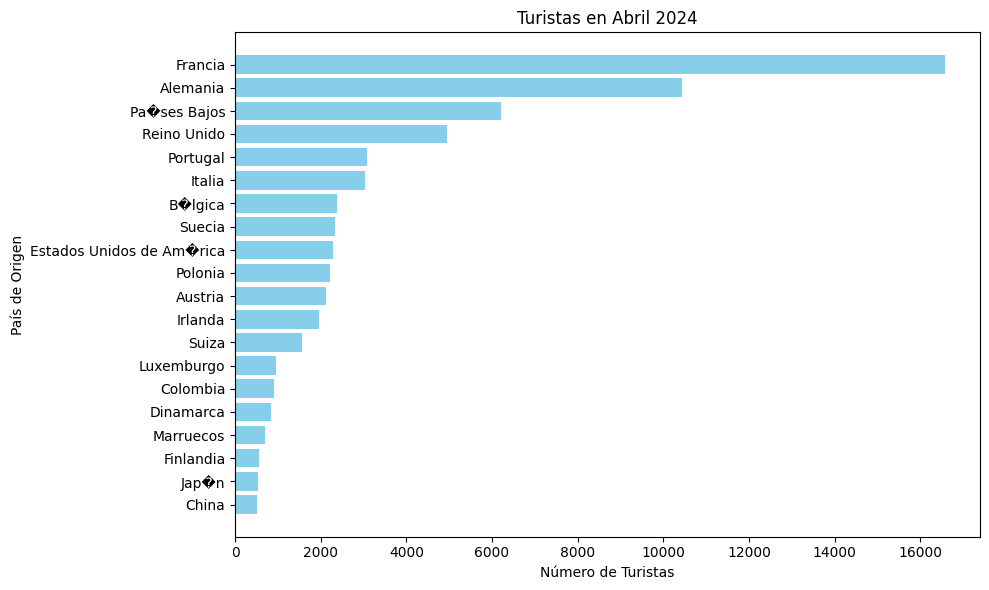

In [49]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes4_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes4_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Abril 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS MAYO 2024 EN BIZKAIA

In [50]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes5= filtrar_datos("Bizkaia", mes= 5) 
prov_Bizkaia_mes5_ordenada= provincia_Bizkaia_mes5.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes5_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
11476,5,Bizkaia,Francia,17018.0
11449,5,Bizkaia,Alemania,11068.0
11503,5,Bizkaia,Pa�ses Bajos,7166.0
11507,5,Bizkaia,Reino Unido,5955.0
11472,5,Bizkaia,Estados Unidos de Am�rica,4966.0
11487,5,Bizkaia,Italia,3032.0
11515,5,Bizkaia,Suecia,2731.0
11485,5,Bizkaia,Irlanda,2474.0
11455,5,Bizkaia,Austria,2346.0
11460,5,Bizkaia,B�lgica,2301.0


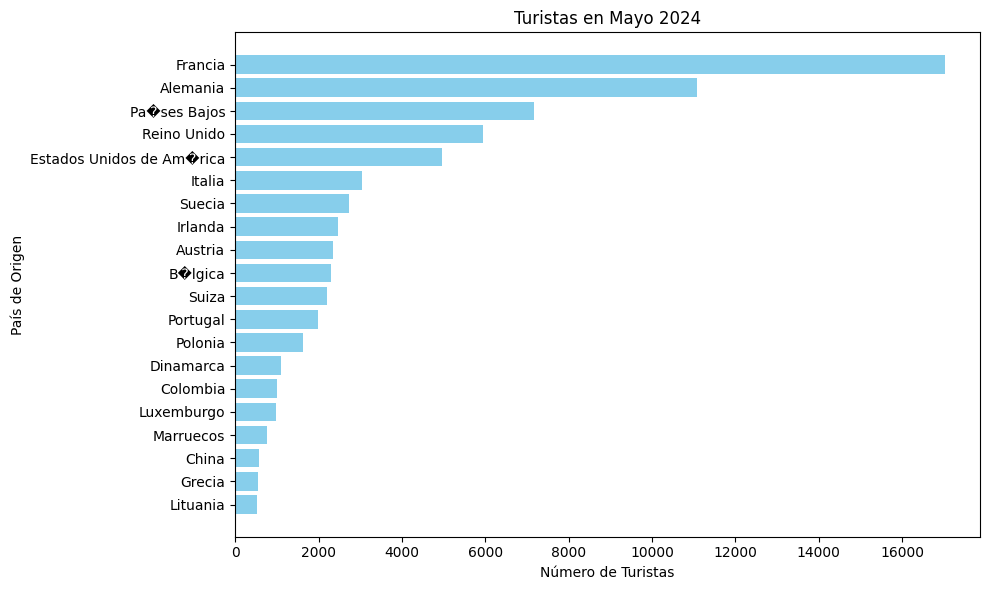

In [51]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes5_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes5_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Mayo 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS JUNIO 2024 EN BIZKAIA

In [ ]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes6= filtrar_datos("Bizkaia", mes= 6) 
prov_Bizkaia_mes6_ordenada= provincia_Bizkaia_mes6.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes6_ordenada

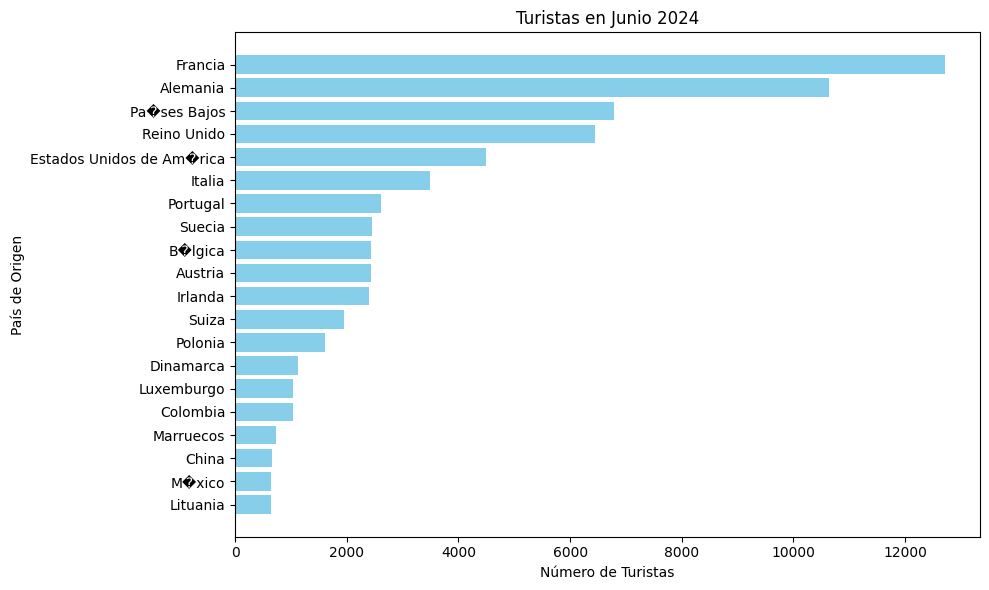

In [52]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes6_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes6_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Junio 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS JULIO 2024 EN BIZKAIA

In [53]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes7= filtrar_datos("Bizkaia", mes= 7) 
prov_Bizkaia_mes7_ordenada= provincia_Bizkaia_mes7.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes7_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
17502,7,Bizkaia,Francia,15714.0
17475,7,Bizkaia,Alemania,10217.0
17527,7,Bizkaia,Pa�ses Bajos,7263.0
17531,7,Bizkaia,Reino Unido,7177.0
17498,7,Bizkaia,Estados Unidos de Am�rica,5196.0
17486,7,Bizkaia,B�lgica,4292.0
17512,7,Bizkaia,Italia,4042.0
17539,7,Bizkaia,Suecia,3237.0
17529,7,Bizkaia,Polonia,2824.0
17540,7,Bizkaia,Suiza,2663.0


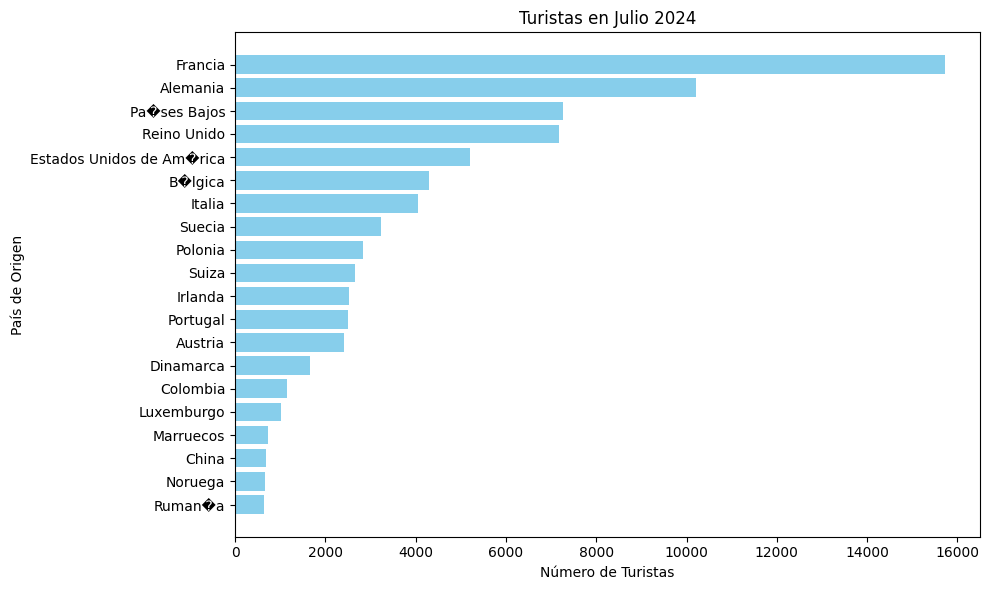

In [54]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes7_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes7_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Julio 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS AGOSTO 2024 EN BIZKAIA

In [55]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes8= filtrar_datos("Bizkaia", mes= 8) 
prov_Bizkaia_mes8_ordenada= provincia_Bizkaia_mes8.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes8_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
20561,8,Bizkaia,Francia,22048.0
20534,8,Bizkaia,Alemania,11189.0
20572,8,Bizkaia,Italia,8640.0
20591,8,Bizkaia,Pa�ses Bajos,8236.0
20595,8,Bizkaia,Reino Unido,7657.0
20545,8,Bizkaia,B�lgica,3732.0
20557,8,Bizkaia,Estados Unidos de Am�rica,3490.0
20603,8,Bizkaia,Suiza,2994.0
20594,8,Bizkaia,Portugal,2801.0
20540,8,Bizkaia,Austria,2648.0


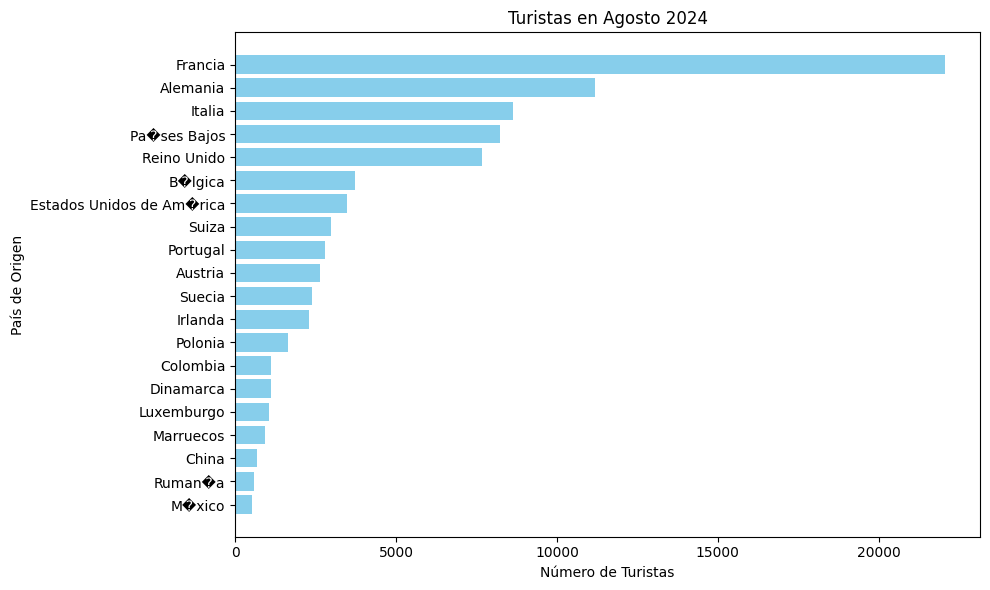

In [56]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes8_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes8_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Agosto 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS SEPTIEMBRE 2024 EN BIZKAIA

In [57]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes9= filtrar_datos("Bizkaia", mes= 9) 
prov_Bizkaia_mes9_ordenada= provincia_Bizkaia_mes9.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes9_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
23685,9,Bizkaia,Francia,12911.0
23659,9,Bizkaia,Alemania,11893.0
23712,9,Bizkaia,Pa�ses Bajos,7438.0
23716,9,Bizkaia,Reino Unido,6613.0
23681,9,Bizkaia,Estados Unidos de Am�rica,5712.0
23696,9,Bizkaia,Italia,3415.0
23724,9,Bizkaia,Suecia,2878.0
23670,9,Bizkaia,B�lgica,2744.0
23694,9,Bizkaia,Irlanda,2557.0
23665,9,Bizkaia,Austria,2543.0


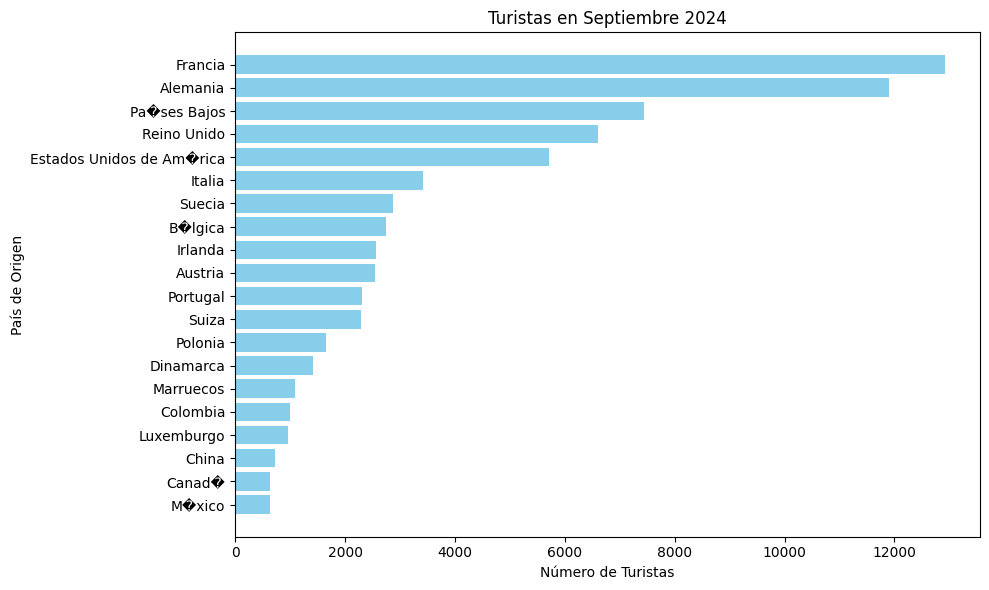

In [58]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes9_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes9_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Septiembre 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS OCTUBRE 2024 EN BIZKAIA

In [59]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes10= filtrar_datos("Bizkaia", mes= 10) 
prov_Bizkaia_mes10_ordenada= provincia_Bizkaia_mes10.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes10_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
26802,10,Bizkaia,Francia,14462.0
26775,10,Bizkaia,Alemania,11978.0
26833,10,Bizkaia,Pa�ses Bajos,8230.0
26837,10,Bizkaia,Reino Unido,6092.0
26798,10,Bizkaia,Estados Unidos de Am�rica,3918.0
26847,10,Bizkaia,Suecia,3441.0
26814,10,Bizkaia,Italia,3113.0
26848,10,Bizkaia,Suiza,2577.0
26781,10,Bizkaia,Austria,2409.0
26786,10,Bizkaia,B�lgica,2407.0


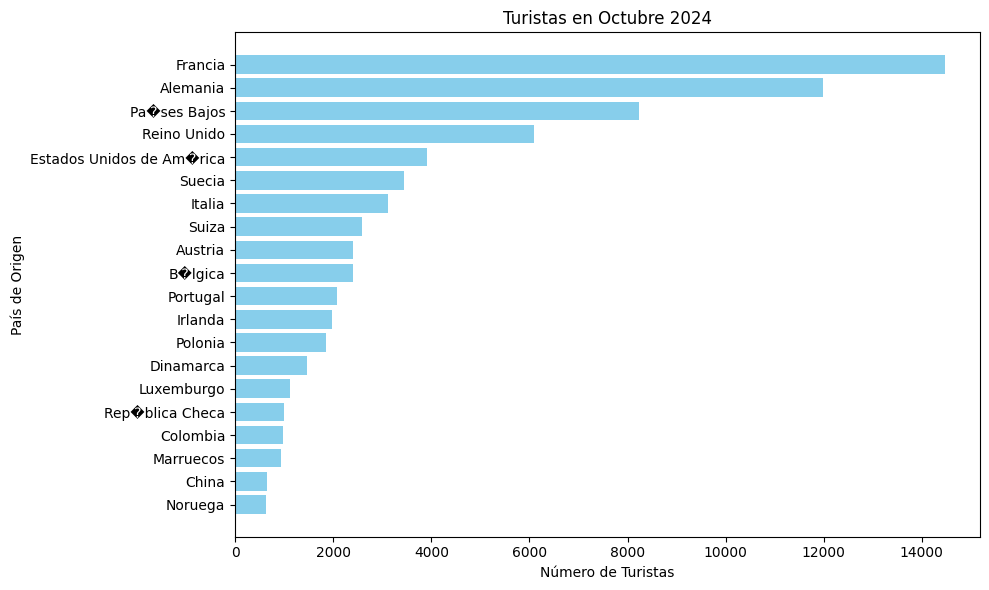

In [60]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes10_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes10_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Octubre 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS NOVIEMBRE 2024 EN BIZKAIA

In [61]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes11= filtrar_datos("Bizkaia", mes= 11) 
prov_Bizkaia_mes11_ordenada= provincia_Bizkaia_mes11.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes11_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
29979,11,Bizkaia,Francia,11321.0
29954,11,Bizkaia,Alemania,6879.0
30005,11,Bizkaia,Pa�ses Bajos,4841.0
30009,11,Bizkaia,Reino Unido,3114.0
30008,11,Bizkaia,Portugal,2459.0
29975,11,Bizkaia,Estados Unidos de Am�rica,2380.0
29989,11,Bizkaia,Italia,2296.0
30017,11,Bizkaia,Suecia,2285.0
29959,11,Bizkaia,Austria,1880.0
29963,11,Bizkaia,B�lgica,1719.0


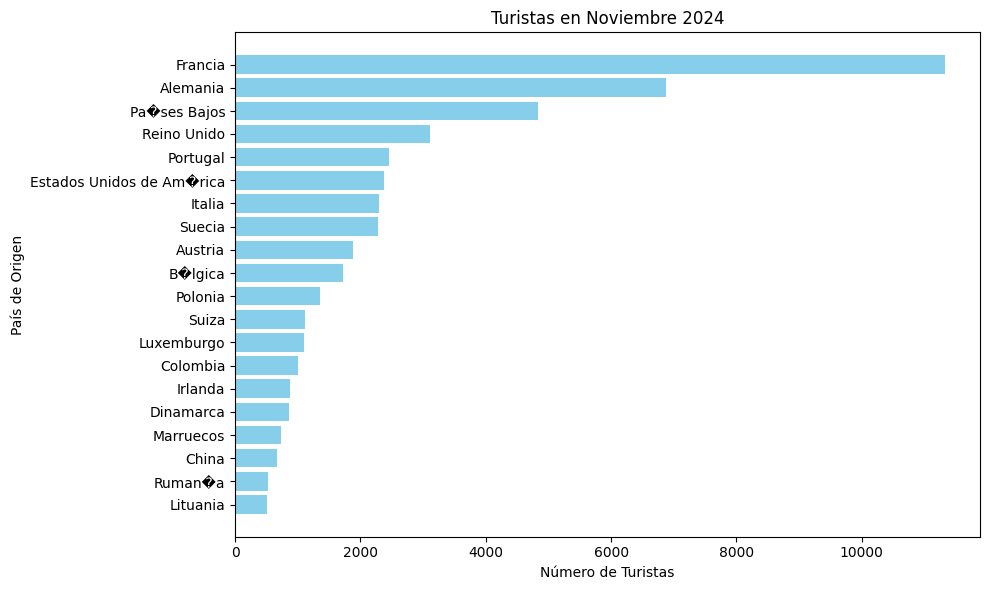

In [62]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes11_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes11_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Noviembre 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()

## Nº DE TURISTAS DICIEMBRE 2024 EN BIZKAIA

In [63]:
def filtrar_datos(provincia, mes=None):
       filtrado_provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== provincia]
       if mes:
        filtrado_provincia= filtrado_provincia[filtrado_provincia["MES"]== mes]
        return filtrado_provincia

provincia_Bizkaia_mes12= filtrar_datos("Bizkaia", mes= 12) 
prov_Bizkaia_mes12_ordenada= provincia_Bizkaia_mes11.sort_values(["TURISTAS"], ascending=False).head(20) #selecciono los 20 principales
prov_Bizkaia_mes12_ordenada

,MES,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
29979,11,Bizkaia,Francia,11321.0
29954,11,Bizkaia,Alemania,6879.0
30005,11,Bizkaia,Pa�ses Bajos,4841.0
30009,11,Bizkaia,Reino Unido,3114.0
30008,11,Bizkaia,Portugal,2459.0
29975,11,Bizkaia,Estados Unidos de Am�rica,2380.0
29989,11,Bizkaia,Italia,2296.0
30017,11,Bizkaia,Suecia,2285.0
29959,11,Bizkaia,Austria,1880.0
29963,11,Bizkaia,B�lgica,1719.0


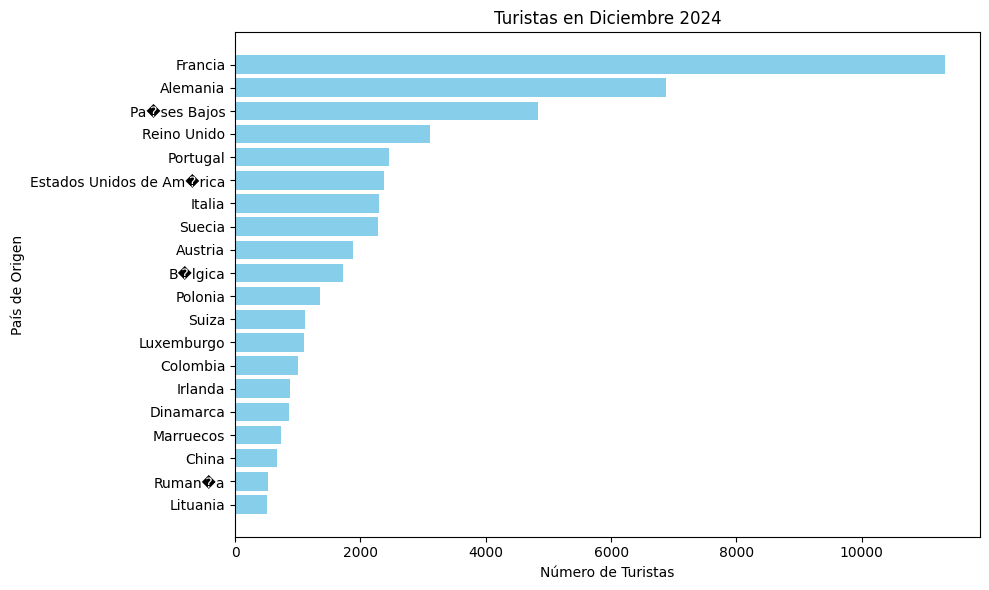

In [64]:
plt.figure(figsize=(10,6))

plt.barh(prov_Bizkaia_mes12_ordenada["PAIS_ORIGEN"], prov_Bizkaia_mes12_ordenada["TURISTAS"], color= "skyblue")

plt.xlabel("Número de Turistas")
plt.ylabel("País de Origen")
plt.title("Turistas en Diciembre 2024")

plt.gca().invert_yaxis() #para que el pais con más turistas este en la parte superior
plt.tight_layout() #ajustar visualización

plt.show()